In [127]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os
import pytesseract

In [128]:
path = 'All_Data/'
files = sorted(os.listdir(path))

In [129]:
files

['MTH_LotCard_Tan_015147_01_Dabney_Juanita.PNG',
 'MTH_LotCard_Tan_015148_01.PNG',
 'MTH_LotCard_Tan_015149_01.PNG',
 'MTH_LotCard_Tan_015150_01.PNG',
 'MTH_LotCard_Tan_015151_01.PNG',
 'MTH_LotCard_Tan_015152_01.PNG',
 'MTH_LotCard_Tan_015153_01.PNG',
 'MTH_LotCard_Tan_015154_01.PNG',
 'MTH_LotCard_Tan_015155_01.PNG',
 'MTH_LotCard_Tan_015156_01.PNG',
 'MTH_LotCard_Tan_015157_01.PNG',
 'MTH_LotCard_Tan_015158_01.PNG',
 'MTH_LotCard_Tan_015159_01.PNG',
 'MTH_LotCard_Tan_015160_01.PNG',
 'MTH_LotCard_Tan_015161_01.PNG',
 'MTH_LotCard_Tan_015162_01.PNG',
 'MTH_LotCard_Tan_015163_01.PNG',
 'MTH_LotCard_Tan_015164_01.PNG',
 'MTH_LotCard_Tan_015165_01.PNG',
 'MTH_LotCard_Tan_015166_01.PNG',
 'MTH_LotCard_Tan_015167_01.PNG',
 'MTH_LotCard_Tan_015168_01.PNG',
 'MTH_LotCard_Tan_015169_01.PNG',
 'MTH_LotCard_Tan_015170_01.PNG',
 'MTH_LotCard_Tan_015171_01.PNG',
 'MTH_LotCard_Tan_015172_01.PNG',
 'MTH_LotCard_Tan_015173_01.PNG',
 'MTH_LotCard_Tan_015174_01.PNG',
 'MTH_LotCard_Tan_015175_01_Daily

In [132]:
def img_show(img, code=cv2.COLOR_BGR2RGB):
    cv_rgb = cv2.cvtColor(img, code)
    fig, ax = plt.subplots(figsize=(16, 10))
    ax.imshow(cv_rgb)
    fig.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


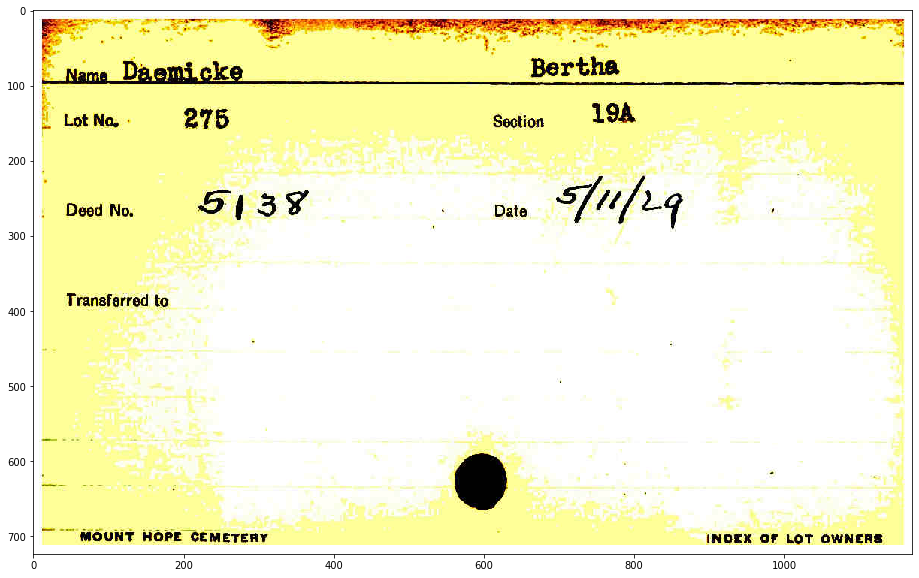

In [136]:
# index of image
i = 2
im = cv2.imread(path+files[i], 1)
# original image
img_show(im)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


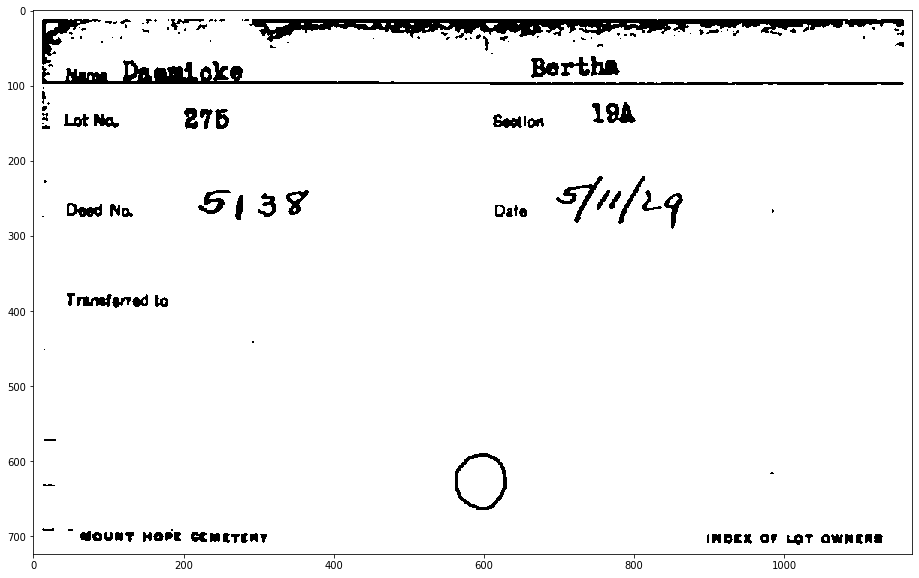

In [134]:
# preprocess:
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, th1 = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
th3 = cv2.adaptiveThreshold(th1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                cv2.THRESH_BINARY, 11, 2)
blur = cv2.medianBlur(th3, 3)  # ksize: 3*3
blur = cv2.medianBlur(blur, 3)

img_show(blur)

In [93]:
# obtain first line
h, w = gray.shape
# horizontal line
horizontal_lines = []
for i in range(h - 1):
    # find the split line
    if abs(np.mean(blur[i, :]) - np.mean(blur[i + 1, :])) > 100:
        # plot the line
        horizontal_lines.append([0, i, w, i])
if horizontal_lines and horizontal_lines[0][1] < 150:
    if horizontal_lines[0][1] > 50:
        first_line = horizontal_lines[0]
    else:
        first_line = horizontal_lines[1]
else:
    first_line = [0, 104, w, 104]
    
print(first_line)

[0, 95, 1171, 95]


In [94]:
horizontal_lines

[[0, 11, 1171, 11], [0, 95, 1171, 95], [0, 99, 1171, 99]]

In [95]:
lines

[[23, 30, 23, 724],
 [1121, 30, 1121, 724],
 [0, 40, 1171, 40],
 [0, 155, 1171, 155],
 [0, 215, 1171, 215],
 [0, 275, 1171, 275],
 [0, 335, 1171, 335],
 [0, 395, 1171, 395],
 [0, 455, 1171, 455],
 [0, 515, 1171, 515]]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


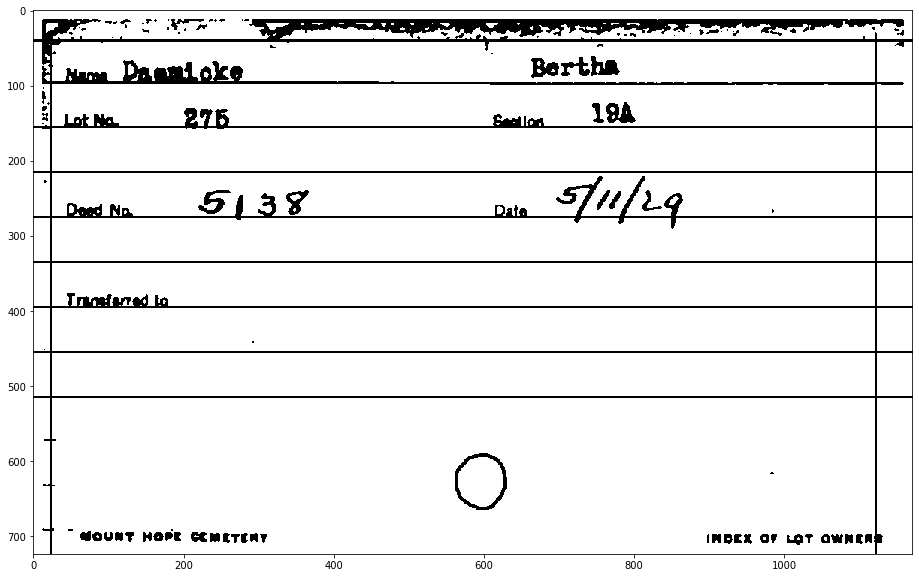

In [96]:
# draw auxiliary lines:
lines = [[23, 30, 23, h], [w-50, 30, w-50, h]]
b = first_line.copy()
first_line[1] -= 55
first_line[3] -= 55
lines.append(first_line)

ret = []
i = 0
while i < 7:
    a = b
    b[1] += 60
    b[3] += 60
    c = a.copy()
    ret.append(c)
    i += 1

lines.extend(ret)
for l in lines:
    ready_image = cv2.line(blur, (l[0], l[1]), (l[2], l[3]), (0, 0, 255), 2)
img_show(ready_image)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


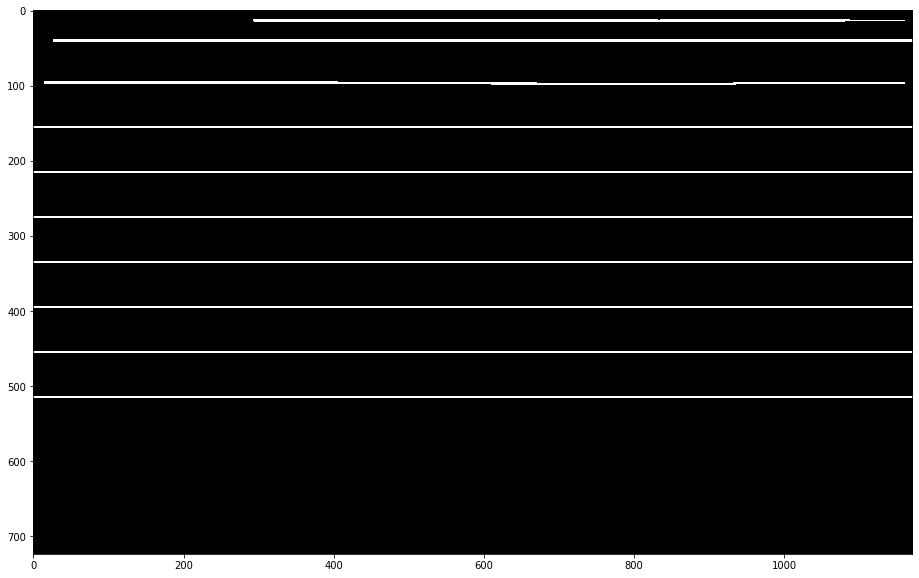

In [97]:
# find all lines:
binary = cv2.adaptiveThreshold(~ready_image, 255,
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, -10)
rows, cols = binary.shape
scale = 20
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (cols // scale, 1))
eroded = cv2.erode(binary, kernel, iterations=2)
dilatedcol = cv2.dilate(eroded, kernel, iterations=2)
img_show(dilatedcol)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


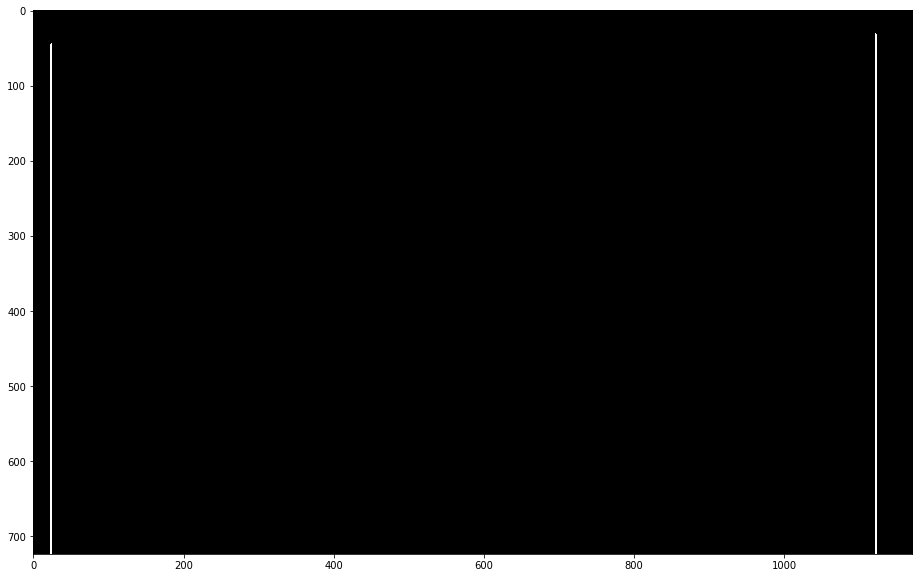

In [98]:
# find all vertical lines:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (1, rows // scale))
eroded = cv2.erode(binary, kernel, iterations=2)
dilatedrow = cv2.dilate(eroded, kernel, iterations=2)
img_show(dilatedrow)

In [99]:
# get vertex
vertex = cv2.bitwise_and(dilatedcol, dilatedrow)
print(np.where(vertex>0))

(array([ 39,  39,  39,  40,  40,  40,  41,  41,  41,  94,  94,  94,  95,
        95,  95,  96,  96,  96,  96,  96,  96,  97,  97,  97,  97,  97,
        97,  98,  98,  98, 154, 154, 154, 154, 154, 154, 155, 155, 155,
       155, 155, 155, 156, 156, 156, 156, 156, 156, 214, 214, 214, 214,
       214, 214, 215, 215, 215, 215, 215, 215, 216, 216, 216, 216, 216,
       216, 274, 274, 274, 274, 274, 274, 275, 275, 275, 275, 275, 275,
       276, 276, 276, 276, 276, 276, 334, 334, 334, 334, 334, 334, 335,
       335, 335, 335, 335, 335, 336, 336, 336, 336, 336, 336, 394, 394,
       394, 394, 394, 394, 395, 395, 395, 395, 395, 395, 396, 396, 396,
       396, 396, 396, 454, 454, 454, 454, 454, 454, 455, 455, 455, 455,
       455, 455, 456, 456, 456, 456, 456, 456, 514, 514, 514, 514, 514,
       514, 515, 515, 515, 515, 515, 515, 516, 516, 516, 516, 516, 516]), array([1120, 1121, 1122, 1120, 1121, 1122, 1120, 1121, 1122,   22,   23,
         24,   22,   23,   24,   22,   23,   24, 1120, 1121,

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


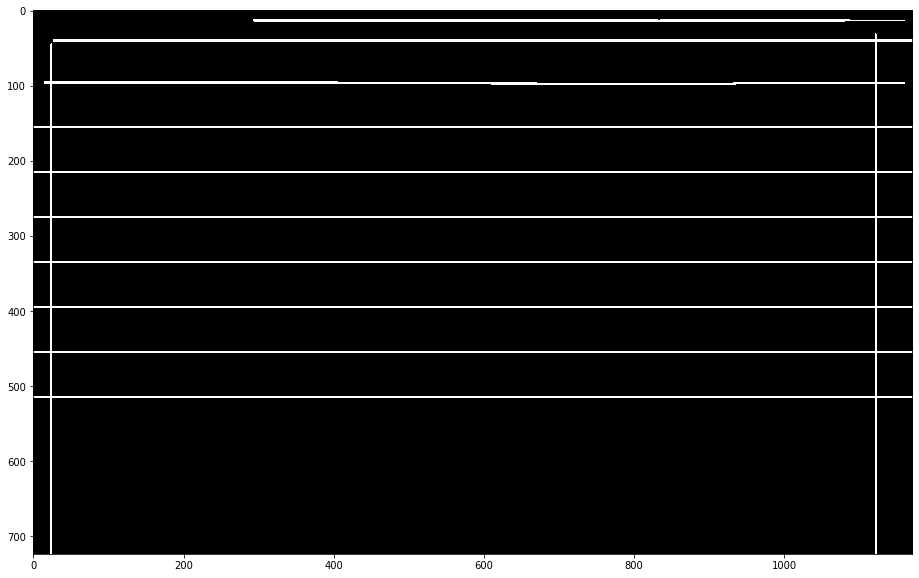

In [100]:
# plot cell
merge = cv2.add(dilatedcol, dilatedrow)
img_show(merge)

In [101]:
ys, xs = np.where(vertex > 0)
x_list, y_list = [], []

# sort list
xs, ys = np.sort(xs), np.sort(ys)
for i in range(len(xs) - 1):
    if xs[i+1] - xs[i] > 20:
        print(xs[i])

24


In [102]:
# get coordinate
ys, xs = np.where(vertex > 0)
x_list, y_list = [], []

# sort list
xs, ys = np.sort(xs), np.sort(ys)

for i in range(len(xs) - 1):
    if xs[i+1] - xs[i] > 20:
        x_list.append(xs[i])
x_list.append(xs[i])
if x_list[0] > 30:
    x_list.append(24)
x_list = sorted(x_list)

for i in range(len(ys) - 1):
    if ys[i+1] - ys[i] > 20:
        y_list.append(ys[i])
y_list.append(ys[i])

print(x_list)
print(y_list)

[24, 1122]
[41, 98, 156, 216, 276, 336, 396, 456, 516]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


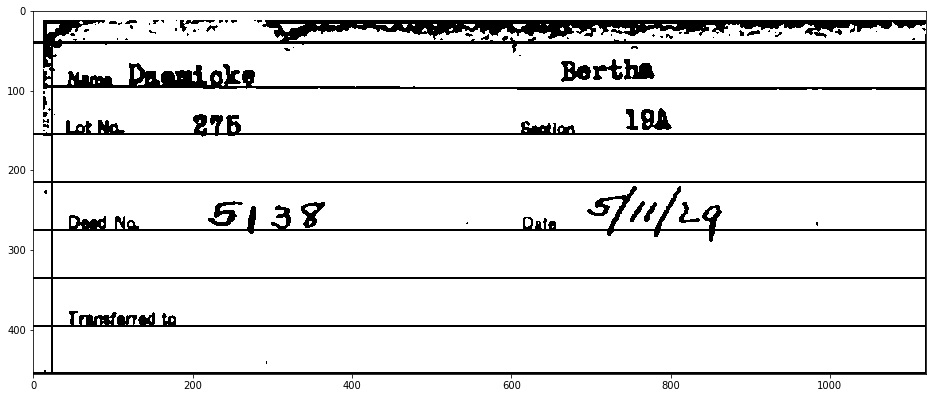

In [103]:
rec_image = ready_image[0:y_list[7], 0:w-50]
img_show(rec_image)

In [104]:
rects = []
for i in range(len(x_list) - 1):
    for j in range(len(y_list) - 1):
        rects.append(((x_list[i], y_list[j], x_list[i + 1], y_list[j + 1])))
print(rects)

[(24, 41, 1122, 98), (24, 98, 1122, 156), (24, 156, 1122, 216), (24, 216, 1122, 276), (24, 276, 1122, 336), (24, 336, 1122, 396), (24, 396, 1122, 456), (24, 456, 1122, 516)]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


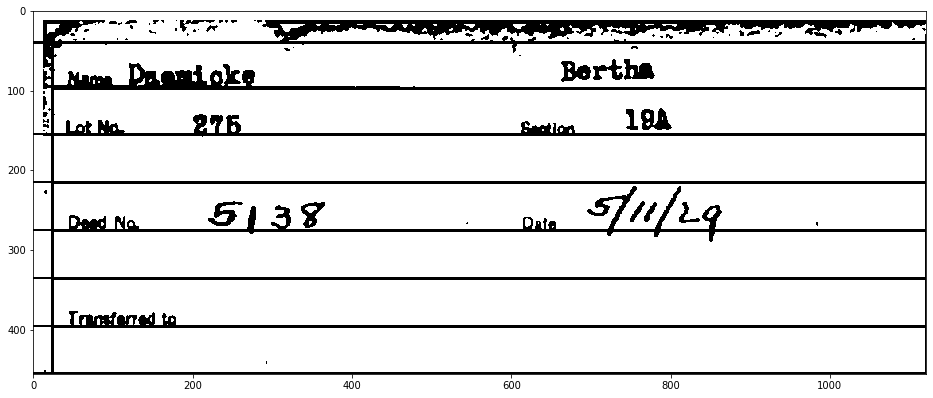

In [105]:
rect_ret = rects[:7]
for rect in rects:
    rec_image = cv2.rectangle(rec_image, (rect[0], rect[1]), (rect[2], rect[3]), (0, 0, 0), 2)
img_show(rec_image)

In [108]:
file_name = ['Name', 'Lot-Sec-Gr', 'Deed No. & Date', 'Comments']
special_char = '‘’,|-_<"=;«“&—]uv'
result = {}
name = rects[0]
detect_img = rec_image[name[1]:name[3], name[0]:name[2]]
text = pytesseract.image_to_string(detect_img, config='-l eng --psm 7')
text = ''.join([char for char in text if char not in special_char])
ret = list(text.partition(' '))

print(ret[-1])

In [110]:
def ocr_text(image, rect):
    file_name = ['Name', 'Lot-Sec-Gr', 'Deed No. & Date', 'Comments']
    special_char = '‘’,|-_<"=;«“&—]uv'
    result = {}
    temp = []
    for i in range(7):
        rect1 = rects[i]
        detect_img = image[rect1[1]:rect1[3], rect1[0]:rect1[2]]
        text = pytesseract.image_to_string(detect_img, config='-l eng --psm 10')
        text = ''.join([char for char in text if char not in special_char])
        ret = list(text.partition(' '))
        ret = ret[2:]
        temp.append(ret)
    
    result[file_name[0]] = temp[0]
    result[file_name[1]] = temp[1:3]
    result[file_name[2]] = temp[3:5]
    result[file_name[3]] = temp[5:]

        

    
    return result
        

In [111]:
ocr_text(rec_image, rect_ret)

{'Name': ['ee'],
 'Lot-Sec-Gr': [['me'], ['']],
 'Deed No. & Date': [['CNB tft gq'], ['']],
 'Comments': [[''], ['']]}